# Imports and Function Definitions

In [1]:
from commons import *

def aggregateSummary(dfResults):
    rows = []
    for dataset, dfDataset in dfResults.groupby("dataset"):
        dfSafeguard = dfDataset[dfDataset["algorithm"] == "safeguard"]
        dfVanilla = dfDataset[dfDataset["algorithm"] == "vanilla"]
        
        n_successes_safeguard = []
        n_successes_vanilla = []
        n_avoided_safeguard = []
        n_timeouts_safeguard = []
        n_timeouts_vanilla = []
        t_successes_safeguard = []
        t_successes_vanilla = []
        for expid, dfExp in dfSafeguard.groupby("experiment_id"):
            dfSuccesses = dfExp[dfExp["status"] == "success"]
            n_successes_safeguard.append(len(dfSuccesses))
            n_avoided_safeguard.append(np.count_nonzero(dfExp["status"] == "safeguard"))
            n_timeouts_safeguard.append(np.count_nonzero(dfExp["status"] == "timeout"))
            t_successes_safeguard.append(5 * np.sum(dfSuccesses["actualFitTime"] + dfSuccesses["actualPredictTime"]))
        for expid, dfExp in dfVanilla.groupby("experiment_id"):
            dfSuccesses = dfExp[dfExp["status"] == "success"]
            n_successes_vanilla.append(len(dfSuccesses))
            t_successes_vanilla.append(5 * np.sum(dfSuccesses["actualFitTime"] + dfSuccesses["actualPredictTime"]))
            n_timeouts_vanilla.append(np.count_nonzero(dfExp["status"] == "timeout"))
            
        rows.append([dataset, np.mean(n_successes_safeguard), np.mean(n_successes_vanilla), np.mean(n_avoided_safeguard), np.mean(n_timeouts_safeguard), np.mean(n_timeouts_vanilla), np.mean(t_successes_safeguard), np.mean(t_successes_vanilla)])
    
    return pd.DataFrame(rows, columns=["dataset", "n_successes_safeguard", "n_successes_vanilla", "n_avoided", "n_timeouts_safeguard", "n_timeouts_vanilla", "t_successes_safeguard", "t_successes_vanilla"])

dsShortcuts = {
    "amazon-commerce-reviews": "amazon",
    "Clickpredictionsmall": "clickPredSmall",
    "mnistrotationbackimagenew": "mnistrot"
}

def getDatasetName(openmlid):
    dfDatasets = pd.read_csv("data/metafeatures-derived.csv")
    datasetname = dfDatasets[dfDatasets["openmlid"] == openmlid]["name"].values[0].replace("_", "")
    if datasetname in dsShortcuts:
        datasetname = dsShortcuts[datasetname]
    return datasetname

# Read in ML-Plan Data

In [2]:
dfResults = pd.read_csv("data/results/5mccv_filtered_results.csv", delimiter=";")
dfResults = dfResults.query("dataset != 180") # exclude one version of covertype
dfResultsVanilla = dfResults[dfResults["algorithm"] == "vanilla"]
dfResultsSafeguard = dfResults[dfResults["algorithm"] == "safeguard"]
dfComparison = aggregateSummary(dfResults)
dfComparison

,dataset,n_successes_safeguard,n_successes_vanilla,n_avoided,n_timeouts_safeguard,n_timeouts_vanilla,t_successes_safeguard,t_successes_vanilla
0,273,114.8,21.888889,145.4,30.4,57.777778,6325.7151,1960.107333
1,293,165.4,22.700000,157.2,15.1,57.800000,13266.8320,1841.938200
2,300,155.2,44.700000,109.9,46.1,62.700000,6723.6004,2054.000500
3,351,214.5,55.000000,101.6,16.4,55.600000,11011.5049,3100.622300
4,354,207.4,46.000000,121.8,14.5,60.200000,11662.2594,2326.877000
5,357,135.6,35.400000,92.9,36.4,54.100000,6555.8044,2702.269500
6,389,272.6,118.000000,109.9,29.2,53.000000,10436.5373,4091.999100
7,390,98.1,13.600000,106.7,38.1,60.700000,5953.8368,569.647600
8,391,446.4,175.700000,49.8,35.3,51.400000,10032.3451,5877.920400
9,392,500.0,83.500000,56.8,14.5,62.600000,17967.0960,3476.156500


# Paper Plots

## Avoided Executions

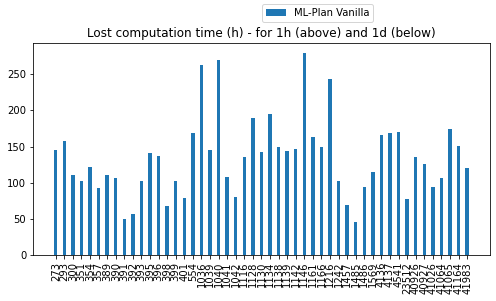

In [3]:
def getAvoidedExecutionsPlot(df):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(7, 4))
    datasets = list(df["dataset"])
    ind = np.arange(len(datasets))
    width = 0.4
    a = ax
    a.bar(ind, df["n_avoided"], width=width)
    a.set_title("Lost computation time (h) - for 1h (above) and 1d (below)")
    a.set_xticks(np.arange(len(datasets)))
    a.set_xticklabels([dsShortcuts[d] if d in dsShortcuts else d for d in datasets], rotation=90)
    lgd = fig.legend(["ML-Plan Vanilla", "ML-Plan with Guard"], bbox_to_anchor=(0.75, 1.05), ncol=2)
    fig.tight_layout()
    fig.subplots_adjust(wspace=0, hspace=0)
    fig.savefig("plots/avoidances.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    
getAvoidedExecutionsPlot(dfComparison)

## Wasted Time

(<Figure size 720x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9294e8fd0>)

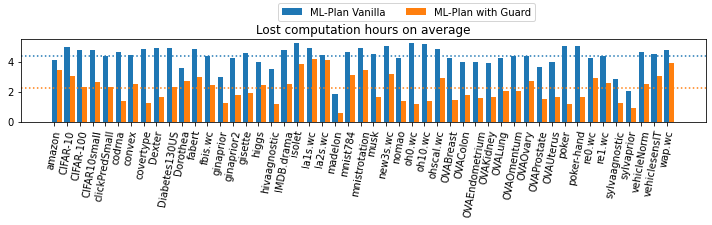

In [4]:
def getPlotForWastedTimes(df, ax=None):
    
    datasets = sorted(list(df["dataset"]), key=lambda t: getDatasetName(t).lower())
    failTimeVanilla = np.array([df[df["dataset"] == d]["n_timeouts_vanilla"].values[0] for d in datasets])
    failTimeGuarded = np.array([df[df["dataset"] == d]["n_timeouts_safeguard"].values[0] for d in datasets])
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    else:
        fig = None
    
    ind = np.arange(len(datasets))
    width = 0.4
    a = ax
    a.bar(ind, failTimeVanilla * 5 / 60, width=width)
    a.bar(ind + width, failTimeGuarded  * 5 / 60, width=width)
    a.set_title("Lost computation hours on average")
    a.set_xticks(np.arange(len(datasets)))
    a.set_xticklabels([getDatasetName(d) for d in datasets], rotation=80)
    a.axhline(np.mean(failTimeVanilla) * 5 / 60, linestyle="dotted", color="C0", label="_nolegend_")
    a.axhline(np.mean(failTimeGuarded) * 5 / 60, linestyle="dotted", color="C1", label="_nolegend_")
    if not fig is None:
        lgd = fig.legend(["ML-Plan Vanilla", "ML-Plan with Guard"], bbox_to_anchor=(0.75, 1.05), ncol=2)
        fig.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        fig.savefig("plots/wastedtimes.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    return fig, ax

getPlotForWastedTimes(dfComparison)

## Successful Runs

(<Figure size 720x252 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb929417350>,
       dtype=object))

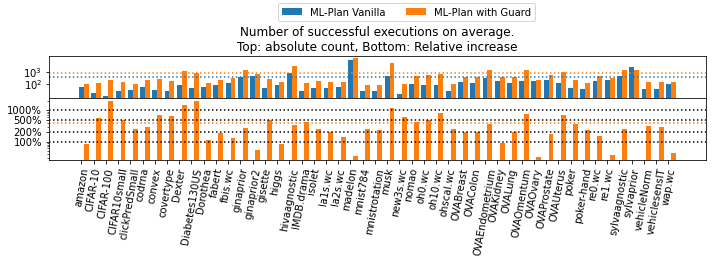

In [5]:
def plotSuccessNumbers(df, ax=None):

    # setup dummy values for the lost time
    datasets = sorted(list(df["dataset"]), key=lambda t: getDatasetName(t).lower())
    successesVanilla1h = np.array([df[df["dataset"] == d]["n_successes_vanilla"].values[0] for d in datasets])
    successesGuarded1h = np.array([df[df["dataset"] == d]["n_successes_safeguard"].values[0] for d in datasets])

    if ax is None:
        fig, ax = plt.subplots(2, 1, figsize=(10, 3.5), sharex=True, gridspec_kw={'height_ratios': [1, 1.5]})
    else:
        fig = None
    
    ind = np.arange(len(datasets))
    width = 0.4
    a = ax[0]
    a.set_title("Number of successful executions on average.\nTop: absolute count, Bottom: Relative increase")
    a.bar(ind, successesVanilla1h, width=width)
    a.bar(ind + width, successesGuarded1h, width=width)
    a.axhline(np.mean(successesVanilla1h), color="C0", linestyle="dotted", label="_nolegend_")
    a.axhline(np.mean(successesGuarded1h), color="C1", linestyle="dotted", label="_nolegend_")
    a.set_yscale("log")
    a.set_yticks([100, 1000])
    a = ax[1]
    avgSuccImprovements1h = (successesGuarded1h - successesVanilla1h) / successesVanilla1h
    a.bar(ind, np.zeros(len(avgSuccImprovements1h)), width=width)
    a.bar(ind + width, avgSuccImprovements1h, width=width)

    for i in [1, 2, 5, 10]:
        a.axhline(i, linewidth=1.5, color="black", linestyle="dotted", label="_nolegend_")
    a.set_yscale("log")
    a.set_yticks([1, 2, 5, 10])
    a.set_yticklabels([str(i * 100) + "%" for i in [1, 2, 5, 10]])
    
    a.axhline(np.mean(avgSuccImprovements1h), color="C1", linestyle="dotted", label="_nolegend_")

    a.set_xticks(np.arange(len(datasets)))
    a.set_xticklabels([getDatasetName(d) for d in datasets], rotation=80)
    if not fig is None:
        lgd = fig.legend(["ML-Plan Vanilla", "ML-Plan with Guard"], bbox_to_anchor=(0.75, 1.05), ncol=2)
        fig.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        fig.savefig("plots/successes.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    return fig, ax
    
plotSuccessNumbers(dfComparison)

## Success Times

(<Figure size 720x252 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb91d069990>,
       dtype=object))

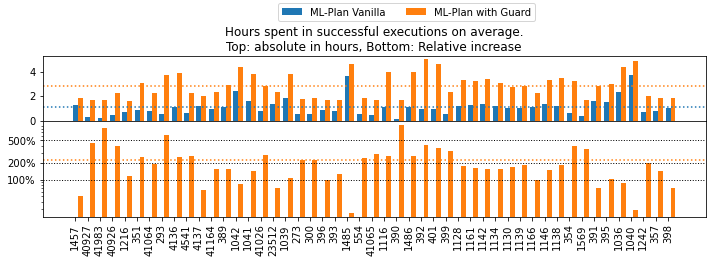

In [6]:
def plotSuccessTimes(df, ax=None):
    
    # setup dummy values for the lost time
    datasets = sorted(list(df["dataset"]), key=lambda t: getDatasetName(t).lower())
    succTimesVanilla1h = np.array([df[df["dataset"] == d]["t_successes_vanilla"].values[0] / 3600 for d in datasets])
    succTimesGuarded1h = np.array([df[df["dataset"] == d]["t_successes_safeguard"].values[0] / 3600 for d in datasets])
    
    if ax is None:
        fig, ax = plt.subplots(2, 1, figsize=(10, 3.5), sharex=True, gridspec_kw={'height_ratios': [1, 1.5]})
    else:
        fig = None
    
    ind = np.arange(len(datasets))
    width = 0.4
    a = ax[0]
    a.set_title("Hours spent in successful executions on average.\nTop: absolute in hours, Bottom: Relative increase")
    a.bar(ind, succTimesVanilla1h, width=width)
    a.bar(ind + width, succTimesGuarded1h, width=width)
    a.axhline(np.mean(succTimesVanilla1h), color="C0", linestyle="dotted", label="_nolegend_")
    a.axhline(np.mean(succTimesGuarded1h), color="C1", linestyle="dotted", label="_nolegend_")
    
    ##a.set_yscale("log")
    #a.set_ylim([100, 20000])
    #a.set_yticks([100, 1000, 10000])
    a = ax[1]
    avgSuccTimesImprovements1h = (succTimesGuarded1h - succTimesVanilla1h) / succTimesVanilla1h
    a.bar(ind, np.zeros(len(avgSuccTimesImprovements1h)), width=width)
    a.bar(ind + width, avgSuccTimesImprovements1h, width=width)
    a.axhline(1, linewidth=1, color="black", linestyle="dotted", label="_nolegend_")
    a.axhline(2, linewidth=1, color="black", linestyle="dotted", label="_nolegend_")
    a.axhline(5, linewidth=1, color="black", linestyle="dotted", label="_nolegend_")
    a.set_yscale("log")
    a.set_xticks(np.arange(len(datasets)))
    #a.set_xticklabels([getDatasetName(d) for d in datasets], rotation=90)
    a.set_xticklabels(datasets, rotation=90)
    a.set_yticks([1, 2, 5])
    a.set_yticklabels([str(i * 100) + "%" for i in [1, 2, 5]])
    
    a.axhline(np.mean(avgSuccTimesImprovements1h), color="C1", linestyle="dotted", label="_nolegend_")
    
    if not fig is None:
        lgd = fig.legend(["ML-Plan Vanilla", "ML-Plan with Guard"], bbox_to_anchor=(0.75, 1.05), ncol=2)
        fig.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        fig.savefig("plots/successtimes.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    return fig, ax
    
plotSuccessTimes(dfComparison)

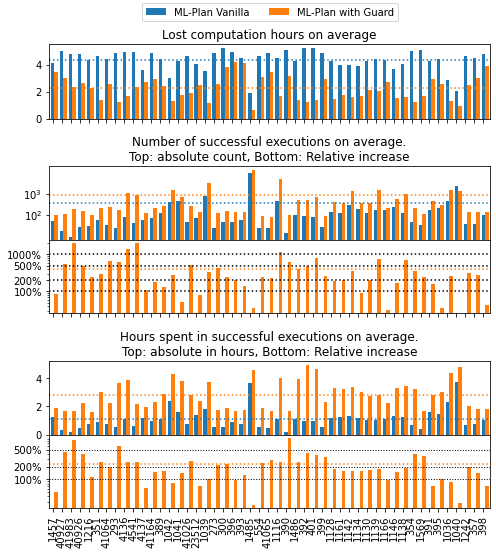

In [7]:
fig, ax = plt.subplots(5, 1, figsize=(7, 7.5), sharex=True, gridspec_kw={'height_ratios': [1.5, 1, 1, 1, 1]})
getPlotForWastedTimes(dfComparison, ax[0])
plotSuccessNumbers(dfComparison, ax[[1,2]])
plotSuccessTimes(dfComparison, ax[[3,4]])
for a in ax:
    a.set_xlim([-0.4, 48.7])
lgd = fig.legend(["ML-Plan Vanilla", "ML-Plan with Guard"], bbox_to_anchor=(0.8, 1.03), ncol=2)
fig.tight_layout()

def glueVertically(ax1, ax2):
    pos1 = ax1.get_position()
    pos2 = ax2.get_position()
    points1 = pos1.get_points()
    points2 = pos2.get_points()
    gap = points1[0][1] - points2[1][1]
    points2[1][1] += gap/2
    points1[0][1] -= gap/2
    pos1.set_points(points1)
    pos2.set_points(points2)
    ax1.set_position(pos1)
    ax2.set_position(pos2)

# make number of execution plots tight
glueVertically(ax[1], ax[2])

# make time of execution plots tight
glueVertically(ax[3], ax[4])

fig.savefig("plots/combinedplots.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

# Final Result Table

In [8]:
dfResultsFinal = pd.read_csv("data/results/5mccv-finalresults.csv", delimiter=";")
dfResultsFinal = dfResultsFinal.query("dataset != 180")
dfResultsFinal

,experiment_id,dataset,algorithmmode,seed,timeout,evaltimeout,cpus,memory_max,time_created,host,executor,time_started,dataset_name,loss,candidate,c_induction,c_inference,exception,time_end,algorithm
2,3,293,vanilla,0,3600,300,8,32678,2020-12-09 09:16:26,node03-037,JobID#6,2020-12-09 17:02:26,covertype,0.105850,"{""component"":{""name"":""weka.classifiers.trees.R...",NaN,NaN,NaN,2020-12-09 18:00:37,vanilla
4,5,300,vanilla,0,3600,300,8,32678,2020-12-09 09:16:26,node01-007,JobID#259,2020-12-09 17:21:37,isolet,0.057717,"{""component"":{""name"":""weka.classifiers.trees.R...",NaN,NaN,NaN,2020-12-09 18:18:30,vanilla
5,6,293,vanilla,1,3600,300,8,32678,2020-12-09 09:16:26,node04-046,JobID#267,2020-12-09 17:43:40,covertype,0.088839,"{""component"":{""name"":""weka.classifiers.trees.R...",NaN,NaN,NaN,2020-12-09 18:42:11,vanilla
6,7,300,vanilla,1,3600,300,8,32678,2020-12-09 09:16:26,node11-030,JobID#39,2020-12-09 16:52:19,isolet,0.033775,"{""component"":{""name"":""weka.classifiers.functio...",NaN,NaN,NaN,2020-12-09 17:51:25,vanilla
7,8,351,vanilla,0,3600,300,8,32678,2020-12-09 09:16:26,node08-046,JobID#67,2020-12-09 16:45:37,codrna,0.043631,"{""component"":{""name"":""weka.classifiers.trees.R...",NaN,NaN,NaN,2020-12-09 17:45:48,vanilla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,496,40927,safeguard,8,3600,300,8,32678,2020-12-09 09:10:24,node08-004,JobID#482,2020-12-09 16:25:01,CIFAR_10,0.584333,"{""component"":{""name"":""weka.classifiers.meta.Ra...",NaN,NaN,NaN,2020-12-09 17:29:54,safeguard
996,497,41983,safeguard,7,3600,300,8,32678,2020-12-09 09:10:24,node03-011,JobID#433,2020-12-09 16:10:37,CIFAR-100,0.652722,"{""component"":{""name"":""weka.classifiers.meta.Ra...",NaN,NaN,NaN,2020-12-09 17:19:10,safeguard
997,498,41983,safeguard,8,3600,300,8,32678,2020-12-09 09:10:24,node01-010,JobID2#25,2020-12-09 21:19:36,CIFAR-100,0.800000,"{""component"":{""name"":""weka.classifiers.rules.O...",NaN,NaN,NaN,2020-12-09 22:26:49,safeguard
998,499,40927,safeguard,9,3600,300,8,32678,2020-12-09 09:10:24,node04-046,JobID#499,2020-12-09 16:38:59,CIFAR_10,0.602833,"{""component"":{""name"":""weka.classifiers.meta.Ra...",NaN,NaN,NaN,2020-12-09 17:43:18,safeguard


In [9]:
def getFinalResultTable(dfLossResults, dfExecutionResults):
    
    dfSuccessfulExecutions = dfExecutionResults[dfExecutionResults["status"] == "success"]
    rows = []
    for dataset, dfLossResultsOnDataset in dfLossResults.groupby("dataset"):
        
        datasetname = getDatasetName(dataset)
            
        print(dataset, datasetname)
        
        dfSuccessfulExecutionResultsOnData = dfSuccessfulExecutions[dfExecutionResults["dataset"] == dataset]
        dfSuccessfulExecutionsVanilla = dfSuccessfulExecutionResultsOnData[dfSuccessfulExecutionResultsOnData["algorithm"] == "vanilla"]
        dfSuccessfulExecutionsSafeguard = dfSuccessfulExecutionResultsOnData[dfSuccessfulExecutionResultsOnData["algorithm"] == "safeguard"]
        
        # configure row basics
        dfVanillaFinal = dfLossResultsOnDataset[dfLossResultsOnDataset["algorithm"] == "vanilla"]
        dfSafeguardFinal = dfLossResultsOnDataset[dfLossResultsOnDataset["algorithm"] == "safeguard"]
        losses_vanilla = dfVanillaFinal["loss"].dropna().values
        losses_safeguard = dfSafeguardFinal["loss"].dropna().values
        n_successes_vanilla = [len(g) for i, g in dfSuccessfulExecutionsVanilla.groupby("experiment_id")]
        n_successes_safeguard = [len(g) for i, g in dfSuccessfulExecutionsSafeguard.groupby("experiment_id")]
        m1 = np.round(np.mean(losses_vanilla), 2)
        m2 = np.round(np.mean(losses_safeguard), 2)
        m1_succ = np.round(np.mean(n_successes_vanilla), 2)
        m2_succ = np.round(np.mean(n_successes_safeguard), 2)
        row = ["{\\sc " + datasetname + "} ("+str(dataset)+")"]
        row.extend(['{:{width}.{prec}f}'.format(m1, width=5, prec=2) + "$\\pm$" + '{:{width}.{prec}f}'.format(np.std(losses_vanilla), width=5, prec=2)]) # mean losses vanilla
        row.extend([str(m1_succ)]) # mean successful evaluations vanilla
        row.extend(['{:{width}.{prec}f}'.format(m2, width=5, prec=2) + "$\\pm$" + '{:{width}.{prec}f}'.format(np.std(losses_safeguard), width=5, prec=2)]) # mean losses safeguard
        row.extend([str(m2_succ)]) # mean successful evaluations safeguard
        
        # check bold entries
        if m1 <= m2:
            row[1] = "\\textbf{" + row[1] + "}"
        if m1 >= m2:
            row[3] = "\\textbf{" + row[3] + "}"
        if m1_succ >= m2_succ:
            row[2] = "\\textbf{" + row[2] + "}"
        if m1_succ <= m2_succ:
            row[4] = "\\textbf{" + row[4] + "}"
        
        # check significantly equivalent entries
        n1 = min(len(losses_vanilla), len(losses_safeguard))
        n2 = min(len(n_successes_vanilla), len(n_successes_safeguard))
        w1 = sp.stats.wilcoxon(losses_vanilla[:n1], losses_safeguard[:n1])
        w2 = sp.stats.wilcoxon(n_successes_vanilla[:n2], n_successes_safeguard[:n2])
        significative1 = w1[1] < 0.1
        significative2 = w2[1] < 0.1
        if not significative1:
            if m1 < m2:
                row[3] = "\\underline{" + row[3] + "}"
            if m1 > m2:
                row[1] = "\\underline{" + row[1] + "}"
        
        if not significative2:
            if m1_succ > m2_succ:
                row[4] = "\\underline{" + row[4] + "}"
            if m1_succ < m2_succ:
                row[2] = "\\underline{" + row[2] + "}"
        
        rows.append(row)
    
    srows = sorted(rows, key=lambda x: x[0].lower())
    return "\n".join([" & ".join(row) + "\\\\" for row in srows])
print(getFinalResultTable(dfResultsFinal, dfResults))

273 IMDB.drama
293 covertype
300 isolet
351 codrna
354 poker
357 vehiclesensIT
389 fbis.wc
390 new3s.wc


/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2958: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2972: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


391 re0.wc
392 oh0.wc
393 la2s.wc
395 re1.wc
396 la1s.wc
398 wap.wc
399 ohscal.wc
401 oh10.wc
554 mnist784
1036 sylvaagnostic
1039 hivaagnostic
1040 sylvaprior
1041 ginaprior2
1042 ginaprior
1116 musk
1128 OVABreast
1130 OVALung
1134 OVAKidney
1138 OVAUterus
1139 OVAOmentum
1142 OVAEndometrium
1146 OVAProstate
1161 OVAColon
1166 OVAOvary
1216 clickPredSmall
1242 vehicleNorm
1457 amazon
1485 madelon
1486 nomao
1569 poker-hand
4136 Dexter
4137 Dorothea
4541 Diabetes130US
23512 higgs
40926 CIFAR10small
40927 CIFAR-10
41026 gisette
41064 convex
41065 mnistrotation
41164 fabert
41983 CIFAR-100
{\sc amazon} (1457) & \textbf{ 0.28$\pm$ 0.03} & 51.9 & \textbf{ 0.28$\pm$ 0.02} & \textbf{96.6}\\
{\sc CIFAR-100} (41983) & \underline{ 0.80$\pm$ 0.00} & 8.89 & \textbf{ 0.73$\pm$ 0.08} & \textbf{187.5}\\
{\sc CIFAR-10} (40927) &  0.64$\pm$ 0.02 & 16.1 & \textbf{ 0.58$\pm$ 0.01} & \textbf{105.8}\\
{\sc CIFAR10small} (40926) & \textbf{ 0.58$\pm$ 0.02} & 24.4 & \underline{ 0.59$\pm$ 0.02} & \textbf{141